In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

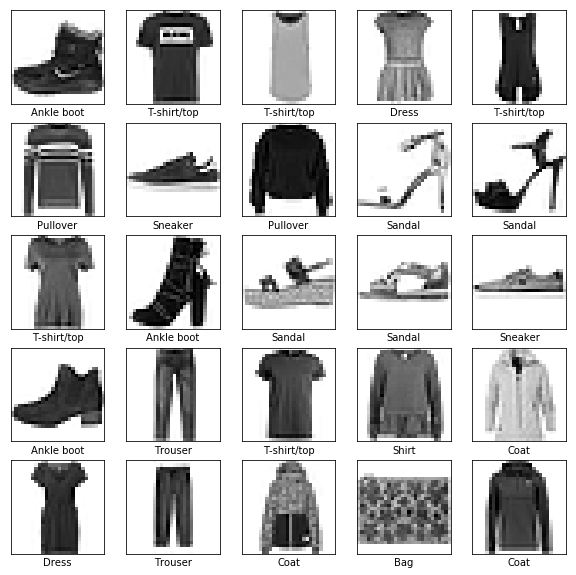

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
# Model Building
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2764 - acc: 0.8982
Epoch 2/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2650 - acc: 0.9022
Epoch 3/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2557 - acc: 0.9040
Epoch 4/50
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2480 - acc: 0.9082
Epoch 5/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2362 - acc: 0.9124
Epoch 6/50
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2282 - acc: 0.9141
Epoch 7/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2241 - acc: 0.9164
Epoch 8/50
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2156 - acc: 0.9180
Epoch 9/50
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2082 - acc: 0.9220
Epoch 10/50
60000/60000 [==============================] - 5s 92us/sample - loss: 

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.5506 - acc: 0.8788
Test accuracy: 0.8788


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([9.7310703e-06, 6.4097914e-09, 4.1859340e-07, 4.5819110e-07,
       1.8680349e-07, 4.7559201e-04, 2.6995640e-05, 1.5424702e-02,
       1.2878917e-05, 9.8404896e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [18]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()